# Технічне завдання до вакансії Junior Data Analyst
*Виконавець:* **Наталія Ярема**

## 🧪 A/B Testing

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, sem

### *Завдання 1: Спланувати проведення A/B тесту*

1. Сформулювати продуктову гіпотезу та мету тесту	   			
2. Обрати цільову та допоміжні метрики   			
3. Розрахувати необхідний розмір вибірки та зазначити, яка має бути аудиторія тесту 			   	

### Тест 1
Наш продукт - мобільний застосунок для медитації та дихальних практик. Раніше після першого відкриття ми одразу показували користувачам екран з пропозицією купити платну підписку за `$7.99`, що розблоковує повний доступ до застосунку, але в новій версії ми хочемо додати кілька екранів онбордингу, щоб краще донести користувачам цінність продукту та що вони отримають з платною підпискою.

**Поточні метрики продукту:**   
- Кількість встановлень застосунку за день - 2000.   
- Конверсія у відкриття екрану з пропозицією купити підписку - 35%.
- Конверсія з перегляду екрану з пропозицією купити підписку у першу покупку - 14%.
- ARPU - `$0,67`.

<span style="color:#27ae60"><b>Мета тесту</b></span> – оцінити, чи впливає новий онбординг на зростання конверсії у першу покупку та збільшення ARPU.  
<span style="color:#27ae60"><b>Продуктова гіпотеза</b></span> – додавання екранів онбордингу до пропозиції купити платну підписку дозволить краще донести цінність застосунку і збільшить конверсію в першу покупку.   
<span style="color:#27ae60"><b>Цільова метрика</b></span> – CR Конверсія у першу покупку.   
<span style="color:#27ae60"><b>Допоміжні метрики</b></span> – ARPU, Кількість кліків на кнопку "Купити підписку", Retention, Сhurn.   
<span style="color:#27ae60"><b>Розмір вибірки</b></span> – 2,468 користувачів на 1 групу при відносному MDE 20%.   
<span style="color:#27ae60"><b>Тривалість тесту</b></span> – 7 днів за умови 350 кристувачів за день на 1 групу (2000*0,35).   
<span style="color:#27ae60"><b>Користувачі</b></span> – Нові користувачі, які щойно встановили застосунок та дійшли до екрану з підпискою. Випадково розділені на дві рівні групи.  

### Тест 2
Наш продукт - вебсайт з записаними онлайн-курсами, що доступні за підпискою. Раніше на сайті була доступна тільки одна опція: доступ до усіх курсів за `$29.99` на місяць. Ми вирішили протестувати альтернативний формат та додати можливість отримати доступ до курсів лише в одному напрямку за `$9.99` на місяць.

**Поточні метрики продукту:**   
- Кількість нових користувачів за день - 3000.   
- Конверсія в першу покупку - 3,7%.
- ARPU - `$2,33`.
- ARPPU - `$62,98`.

<span style="color:#27ae60"><b>Мета тесту</b></span> – оцінити, чи впливає можливість отримати доступ до курсів лише в одному напрямку  на зростання конверсії у першу покупку та збільшення ARPU, ARPPU.  
<span style="color:#27ae60"><b>Продуктова гіпотеза</b></span> – додавання можливості отримати доступ до курсів лише в одному напрямку збільшить конверсію в першу покупку.   
<span style="color:#27ae60"><b>Цільова метрика</b></span> – CR Конверсія у першу покупку.   
<span style="color:#27ae60"><b>Допоміжна метрика</b></span> – ARPU, ARPPU, Кількість кліків на кнопку "Купити підписку",  Retention, Сhurn.   
<span style="color:#27ae60"><b>Розмір вибірки</b></span> – 10,502 користувачів на 1 групу при відносному MDE 20%.   
<span style="color:#27ae60"><b>Тривалість тесту</b></span> – 7 днів за умови 1500 кристувачів за день на 1 групу.  
<span style="color:#27ae60"><b>Користувачі</b></span> – Нові користувачі, які щойно встановили застосунок та дійшли до екрану з підпискою. Випадково розділені на дві рівні групи.  

### *Завдання 2: Проаналізувати результати A/B тесту*

1. Визначити цільову метрику, оцінити її зміну та стат. значущість зміни	   			
2. Визначити допоміжні метрики, оцінити зміни та стат. значущість   			
3. Зробити висновок про результати A/B тесту та описати рекомендації 			   	

### Тест 1
Наш продукт - мобільний застосунок для медитації та дихальних практик. Раніше після першого відкриття ми одразу показували користувачам екран з пропозицією купили платну підписку за `$7.99`, що розблоковує повний доступ до застосунку, але в новій версії ми хочемо додати кілька екранів онбордингу, щоб краще донести користувачам цінність продукту та що вони отримають з платною підпискою.

**Тестова група**: після першого відкриття застосунку користувачам пропонують купити підписку за `$7.99`

**Контрольна група**: після першого відкриття застосунку користувачі проходять онбординг, а потім їм пропонують купити підписку за `$7.99`

**Результати тесту**

| Показник                                               | Control | Treatment |
|--------------------------------------------------------|---------|-----------|
| Кількість користувачів в тесті                         | 8 712   | 8 693     |
| Користувачі, які відкрили екран з підпискою            | 3 180   | 2 096     |
| Кількість оформлень підписки                           | 447     | 452       |

#### Цільова метрика - CR Конверсія у першу покупку.
Використовуємо Z-тест для перевірки різниці у конверсії оскільки порівнюємо 2 біноміальні вибірки, вибірка велика (більше 30 — центральна межова теорема діє).   

CR (Control): 5.1309%
CR (Treatment): 5.1996%
Absolute lift: 0.0687%
Relative lift: 1.34%
95% Confidence interval for Control conversion rate: [4.6676%, 5.5941%]
95% Confidence interval for Treatment conversion rate: [4.7329%, 5.6663%]
Z-statistics: -0.2049
P-value: 0.8377
The difference is NOT statistically significant (fail to reject H₀)


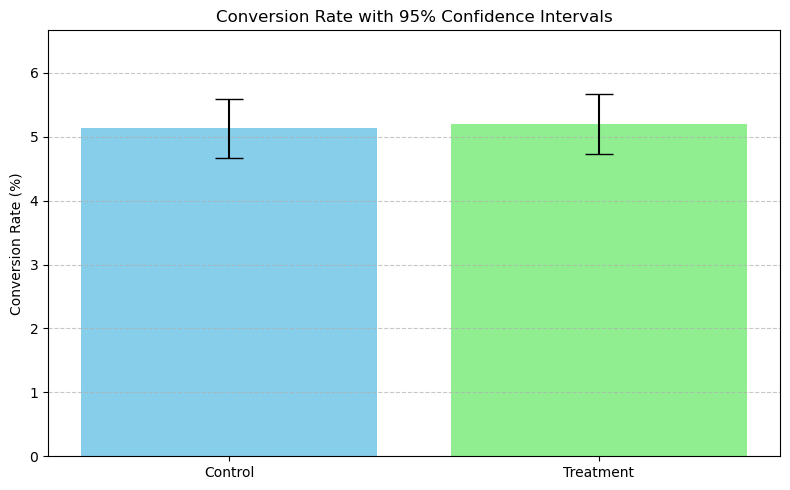

In [14]:
# Data
subscribe = [447, 452]          # subscribe in control і treatment
samples = [8712, 8693]          # users

# Convertion rate
cr_control = subscribe[0] / samples[0]
cr_treatment = subscribe[1] / samples[1]

# Absolute and relative difference
absolute_lift = cr_treatment - cr_control
relative_lift = (absolute_lift / cr_control) * 100  

# Z-test
z_stat, p_value = proportions_ztest(count=subscribe, nobs=samples)

# 95% confidence intervals 
conf_int_control = sm.stats.proportion_confint(subscribe[0], samples[0], alpha=0.05, method='normal')
conf_int_treatment = sm.stats.proportion_confint(subscribe[1], samples[1], alpha=0.05, method='normal')

print(f"CR (Control): {cr_control:.4%}")
print(f"CR (Treatment): {cr_treatment:.4%}")
print(f"Absolute lift: {absolute_lift:.4%}")
print(f"Relative lift: {relative_lift:.2f}%")
print(f"95% Confidence interval for Control conversion rate: [{conf_int_control[0]:.4%}, {conf_int_control[1]:.4%}]")
print(f"95% Confidence interval for Treatment conversion rate: [{conf_int_treatment[0]:.4%}, {conf_int_treatment[1]:.4%}]")
print(f"Z-statistics: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant (reject H₀)")
else:
    print("The difference is NOT statistically significant (fail to reject H₀)")

# Plot
groups = ['Control', 'Treatment']
cr_values = [cr_control, cr_treatment]

conf_lower = [cr_control - conf_int_control[0], cr_treatment - conf_int_treatment[0]]
conf_upper = [conf_int_control[1] - cr_control, conf_int_treatment[1] - cr_treatment]

cr_percent = [v * 100 for v in cr_values]
err_lower = [l * 100 for l in conf_lower]
err_upper = [u * 100 for u in conf_upper]

plt.figure(figsize=(8, 5))
plt.bar(groups, cr_percent, yerr=[err_lower, err_upper], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate with 95% Confidence Intervals')
plt.ylim(0, max(cr_percent) + max(err_upper) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Різниця в конверсії між групами мінімальна (0.07%).   
P-value = 0.8377 набагато вище порогу значущості (0.05), тобто різниця НЕ є статистично значущою.   
Довірчі інтервали для CR обох груп сильно перекриваються, що додатково підтверджує відсутність значущого ефекту.   

#### Допоміжна метрика - Paywall View Rate. Частка користувачів, які побачили екран з підпискою.

Paywall View Rate (Control): 36.50%
Paywall View Rate (Treatment): 24.11%
Absolute Lift: -12.39%
Relative Lift: -33.94%
Paywall View Rate (Control): 36.50% (95% CI: [35.49%, 37.51%])
Paywall View Rate (Treatment): 24.11% (95% CI: [23.21%, 25.01%])
Z-statistic: 17.7823
P-value: 0.0000
The difference is statistically significant (reject H₀)


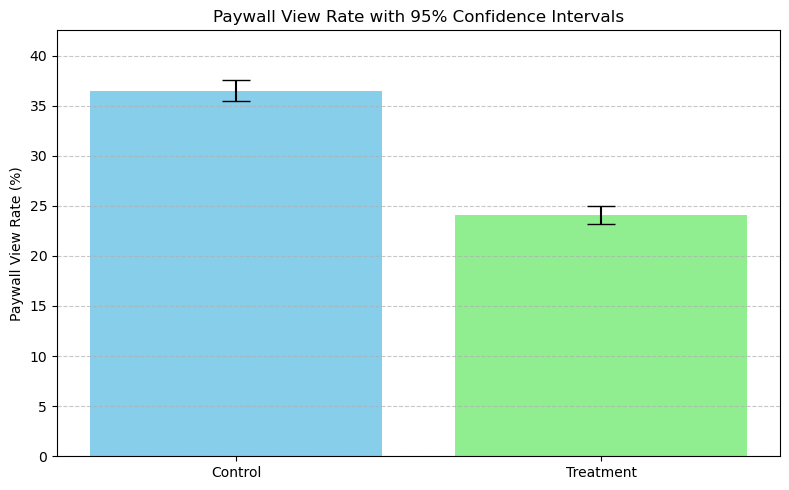

In [13]:
# Data: number of users who saw the paywall
paywall_views = [3180, 2096]  # [control, treatment]
total_users = [8712, 8693]    # [control, treatment]

# Paywall View Rates
pvr_control = paywall_views[0] / total_users[0]
pvr_treatment = paywall_views[1] / total_users[1]

# Absolute and relative difference
absolute_lift = pvr_treatment - pvr_control
relative_lift = (absolute_lift / pvr_control) * 100

# Z-test
z_stat, p_value = proportions_ztest(count=paywall_views, nobs=total_users)

# 95% confidence intervals
conf_int_control = sm.stats.proportion_confint(paywall_views[0], total_users[0], alpha=0.05, method='normal')
conf_int_treatment = sm.stats.proportion_confint(paywall_views[1], total_users[1], alpha=0.05, method='normal')

print(f"Paywall View Rate (Control): {pvr_control:.2%}")
print(f"Paywall View Rate (Treatment): {pvr_treatment:.2%}")
print(f"Absolute Lift: {absolute_lift:.2%}")
print(f"Relative Lift: {relative_lift:.2f}%")
print(f"Paywall View Rate (Control): {pvr_control:.2%} (95% CI: [{conf_int_control[0]:.2%}, {conf_int_control[1]:.2%}])")
print(f"Paywall View Rate (Treatment): {pvr_treatment:.2%} (95% CI: [{conf_int_treatment[0]:.2%}, {conf_int_treatment[1]:.2%}])")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant (reject H₀)")
else:
    print("The difference is NOT statistically significant (fail to reject H₀)")

# Plot
groups = ['Control', 'Treatment']
pvr_values = [pvr_control, pvr_treatment]

conf_lower = [pvr_control - conf_int_control[0], pvr_treatment - conf_int_treatment[0]]
conf_upper = [conf_int_control[1] - pvr_control, conf_int_treatment[1] - pvr_treatment]

pvr_percent = [v * 100 for v in pvr_values]
err_lower = [l * 100 for l in conf_lower]
err_upper = [u * 100 for u in conf_upper]

plt.figure(figsize=(8, 5))
plt.bar(groups, pvr_percent, yerr=[err_lower, err_upper], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Paywall View Rate (%)')
plt.title('Paywall View Rate with 95% Confidence Intervals')
plt.ylim(0, max(pvr_percent) + max(err_upper) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

У тестовій групі значно менше людей дійшли до екрану з підпискою (–12.4% абсолютної різниці).   
P-value = 0.0000 нижче порогу значущості (0.05), тобто різниця є статистично ЗНАЧУЩОЮ.  
Внаслідок додавання екранів онбордингу частина користувачів не доходить  до екрану підписки.   

<span style="color:#27ae60"><b>Цільова метрика</b></span> – CR Конверсія у першу покупку.   
<span style="color:#27ae60"><b>Допоміжна метрика</b></span> – CR в екран з підпискою.     
<span style="color:#27ae60"><b>Висновки:</b></span>   
- Додавання онбордингу істотно зменшило кількість користувачів, які бачать екран підписки.
- Конверсія в оплату серед усіх користувачів залишилась приблизно на тому ж рівні (незначне покращення без статистичної значущості).
- Отже, онбординг не дав позитивного ефекту в термінах монетизації, а навпаки — зменшив видимість пропозиції.
<span style="color:#27ae60"><b>Рекомендації:</b></span> 
- Не впроваджувати нову версію онбордингу в її поточному вигляді.
- Розробити інші версії онбордингу.
- Показати екран підписки після 1-2 взаємодій із продуктом.
- Додати безкоштовний пробний період.

### Тест 2
Наш продукт - вебсайт з записаними онлайн-курсами, що доступні за підпискою. Раніше на сайті була доступна тільки одна опція: доступ до усіх курсів за `$29.99` на місяць. Ми вирішили протестувати альтернативний формат та додати можливість отримати доступ до курсів лише в одному напрямку за `$9.99` на місяць.

**Тестова група**: після реєстрації користувачам пропонується придбати доступ до усіх курсів на платформі за `$29.99`

**Контрольна група**: після реєстрації користувачам пропонується придбати доступ до усіх курсів на платформі за `$29.99`  або доступ до курсів одного напрямку за `$9.99`.

**Результати тесту**

| Показник                                                 | Control | Treatment |
|----------------------------------------------------------|---------|-----------|
| Кількість користувачів в тесті                           | 13623   | 14012     |
| Кількість оформлених підписок за `$29.99`                | 411     | 420       |
| Кількість оформлених підписок за `$9.99`                 | -       | 232       |
| ARPPU користувачів з підпискою за `$29.99`               |`$64,48` |`$62,68`   |
| ARPPU користувачів з підпискою за `$9.99`                | -       |`$27,27`   |

#### Цільова метрика - ARPPU. 
Використовуємо T-тест для перевірки різниці оскільки порівнюємо неперервні метрики.

ARPU Control: $1.95
ARPU Treatment: $2.33
Absolute lift: $0.38
Relative lift: 19.79%
95% CI for Control ARPU: ($1.76 – $2.13)
95% CI for Treatment ARPU: ($2.15 – $2.52)
T-statistic: 2.8833
P-value: 0.0039
The difference is statistically significant (reject H₀)


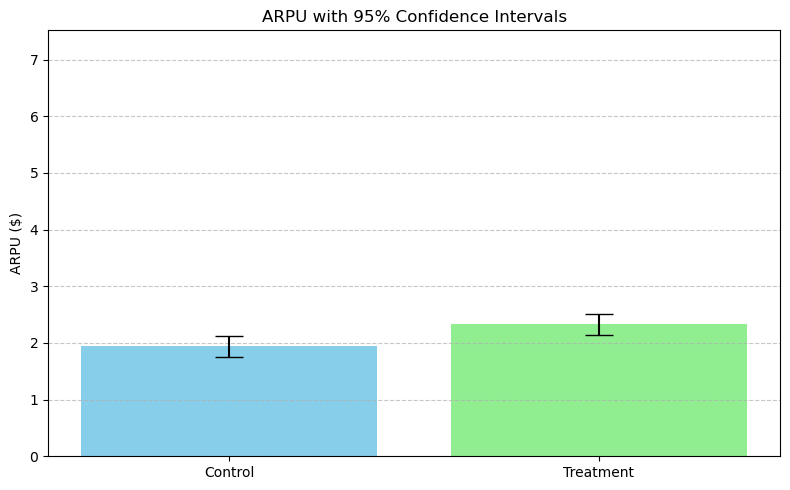

In [27]:
# Data
n_control = 13623
n_treatment = 14012

control_subs = 411
treatment_subs_2999 = 420
treatment_subs_999 = 232
treatment_subs_total = treatment_subs_2999 + treatment_subs_999

arppu_control = 64.48
arppu_treatment_2999 = 62.68
arppu_treatment_999 = 27.27

# ARPU 
revenue_control = control_subs * arppu_control
mean_arpu_control = revenue_control / n_control

revenue_treatment = (treatment_subs_2999 * arppu_treatment_2999) + \
                    (treatment_subs_999 * arppu_treatment_999)
mean_arpu_treatment = revenue_treatment / n_treatment

# Absolute and relative difference
arpu_absolute_lift = mean_arpu_treatment - mean_arpu_control
arpu_relative_lift = (arpu_absolute_lift / mean_arpu_control) * 100

# ARPU testing
arpu_control_data = np.concatenate([
    np.zeros(n_control - control_subs),
    np.full(control_subs, arppu_control)
])

arpu_treatment_data = np.concatenate([
    np.zeros(n_treatment - treatment_subs_total),
    np.full(treatment_subs_2999, arppu_treatment_2999),
    np.full(treatment_subs_999, arppu_treatment_999)
])

# 95% confidence intervals
sem_control = sem(arpu_control_data)
sem_treatment = sem(arpu_treatment_data)

ci_control = 1.96 * sem_control
ci_treatment = 1.96 * sem_treatment

ci_control_range = (mean_arpu_control - ci_control, mean_arpu_control + ci_control)
ci_treatment_range = (mean_arpu_treatment - ci_treatment, mean_arpu_treatment + ci_treatment)

# T-test
t_stat, p_value = ttest_ind(arpu_treatment_data, arpu_control_data, equal_var=False)

print(f"ARPU Control: ${mean_arpu_control:.2f}")
print(f"ARPU Treatment: ${mean_arpu_treatment:.2f}")
print(f"Absolute lift: ${arpu_absolute_lift:.2f}")
print(f"Relative lift: {arpu_relative_lift:.2f}%")
print(f"95% CI for Control ARPU: (${ci_control_range[0]:.2f} – ${ci_control_range[1]:.2f})")
print(f"95% CI for Treatment ARPU: (${ci_treatment_range[0]:.2f} – ${ci_treatment_range[1]:.2f})")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("The difference is statistically significant (reject H₀)" if p_value < 0.05 else "The difference is NOT statistically significant (fail to reject H₀)")

# Plot
groups = ['Control', 'Treatment']
arpu_means = [mean_arpu_control, mean_arpu_treatment]
error_lower = [ci_control, ci_treatment]
error_upper = [ci_control, ci_treatment]

plt.figure(figsize=(8, 5))
plt.bar(groups, arpu_means, yerr=[error_lower, error_upper], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('ARPU ($)')
plt.title('ARPU with 95% Confidence Intervals')
plt.ylim(0, max(arpu_means) + max(error_upper) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

P-value = 0.0039 нижче порогу значущості (0.05), тобто різниця є статистично ЗНАЧУЩОЮ.    
Довірчі інтервали не перекриваються.   
Зміни, запроваджені в експериментальній групі (доступ до курсів одного напрямку за $9.99), суттєво підвищили ARPU на 19.79% у порівнянні з контрольною групою.    

#### Допоміжна метрика - CR Конверсія у першу покупку.
Використовуємо Z-тест для перевірки різниці у конверсії оскільки порівнюємо 2 біноміальні вибірки, вибірка велика (більше 30 — центральна межова теорема діє). 

CR (Control): 3.0170%
CR (Treatment): 4.6532%
Absolute lift (CR): 1.6362%
Relative lift (CR): 54.23%
95% CI for Control CR: [2.7297%, 3.3042%]
95% CI for Treatment CR: [4.3044%, 5.0019%]
Z-statistic: -7.0709
P-value: 0.0000
The difference is statistically significant (reject H₀)


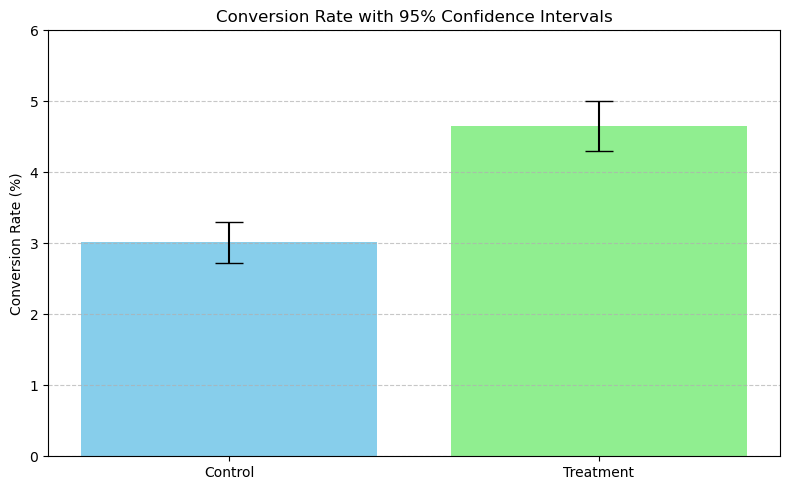

In [28]:
users_control = 13623
users_treatment = 14012

subs_control = 411                    # $29.99
subs_treatment_2999 = 420            # $29.99
subs_treatment_999 = 232             # $9.99
subs_treatment_total = subs_treatment_2999 + subs_treatment_999

subscribe = [subs_control, subs_treatment_total]
samples = [users_control, users_treatment]

# Convertion rate
cr_control = subscribe[0] / samples[0]
cr_treatment = subscribe[1] / samples[1]

# Absolute and relative difference
absolute_lift = cr_treatment - cr_control
relative_lift = (absolute_lift / cr_control) * 100

# Z-test
z_stat, p_value = proportions_ztest(count=subscribe, nobs=samples)

# 95% confidence intervals
conf_int_control = sm.stats.proportion_confint(subscribe[0], samples[0], alpha=0.05, method='normal')
conf_int_treatment = sm.stats.proportion_confint(subscribe[1], samples[1], alpha=0.05, method='normal')


print(f"CR (Control): {cr_control:.4%}")
print(f"CR (Treatment): {cr_treatment:.4%}")
print(f"Absolute lift (CR): {absolute_lift:.4%}")
print(f"Relative lift (CR): {relative_lift:.2f}%")
print(f"95% CI for Control CR: [{conf_int_control[0]:.4%}, {conf_int_control[1]:.4%}]")
print(f"95% CI for Treatment CR: [{conf_int_treatment[0]:.4%}, {conf_int_treatment[1]:.4%}]")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant (reject H₀)")
else:
    print("The difference is NOT statistically significant (fail to reject H₀)")

# Plot
groups = ['Control', 'Treatment']
cr_values = [cr_control, cr_treatment]

conf_lower = [cr_control - conf_int_control[0], cr_treatment - conf_int_treatment[0]]
conf_upper = [conf_int_control[1] - cr_control, conf_int_treatment[1] - cr_treatment]

cr_percent = [v * 100 for v in cr_values]
err_lower = [l * 100 for l in conf_lower]
err_upper = [u * 100 for u in conf_upper]

plt.figure(figsize=(8, 5))
plt.bar(groups, cr_percent, yerr=[err_lower, err_upper], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate with 95% Confidence Intervals')
plt.ylim(0, max(cr_percent) + max(err_upper) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

P-value = 0.0000 нижче порогу значущості (0.05), тобто різниця є статистично ЗНАЧУЩОЮ.    
Довірчі інтервали для контрольної та експериментальної групи не перекриваються, що додатково підтверджує значущість ефекту: різниця між групами суттєва і стабільна.   
Конверсія зросла на 54.23% — це суттєве покращення ефективності експериментальної групи з доступом до курсів одного напрямку за $9.99. 

<span style="color:#27ae60"><b>Цільова метрика</b></span> – ARPU.   
<span style="color:#27ae60"><b>Допоміжна метрика</b></span> – CR в підписку.     
<span style="color:#27ae60"><b>Висновки:</b></span>   
- ARPU та CR — значно покращились в експериментальній групі.
- Експеримент був успішним: нововведення призводять до істотного підвищення доходу і конверсії.
<span style="color:#27ae60"><b>Рекомендації:</b></span>
- Розгорнути експериментальне рішення ( доступ до курсів лише в одному напрямку за $9.99 на місяць) на всю аудиторію, оскільки воно збільшує як дохід на користувача (ARPU), так і коефіцієнт конверсії (CR);